### 基于XGB构建多层次用户画像及标签体系
**任务描述：** 
- 本教程对LendingClub平台贷款数据进行分析并搭建用户画像，学习后可帮助学员在银行，消费金融，现金贷等场景中，实现金融场景下用户画像系统的搭建、多层级标签体系的设计。
- 其中主要由画像体系介绍、python数据清洗、标签设计、画像输出和画像评测组成。

**数据集：** 
- 本数据集来源于kaggle，是2016Q2年到2018Q2年LendingClub实际发放的贷款的信息，总共有145个Column，共计98,2735行数据。
- LendingClub是世界上最大的P2P互联网借贷平台。
- 它的主要业务为根据借款人过往信用记录等信息，评估借款人的违约风险，设置不同的借款利率，借款人可以通过提交申请，快速获得借款；投资人通过浏览借款人的过往信用记录和借款目的等信息，决定是否借款给不同借款利率的借款人，赚取利息收益。

**方法概述：**
- 此案例从底层数据出发，通过多种方式生成高质量的标签，包括从原始数据中抽取的事实标签、从原始数据统计而来的统计标签、通过事实标签分析衍生而来的模型标签和模型实现的算法标签等。
- 本教程还讲述了如何使用因子分析的方法来剖析特征集内部的信息维度。

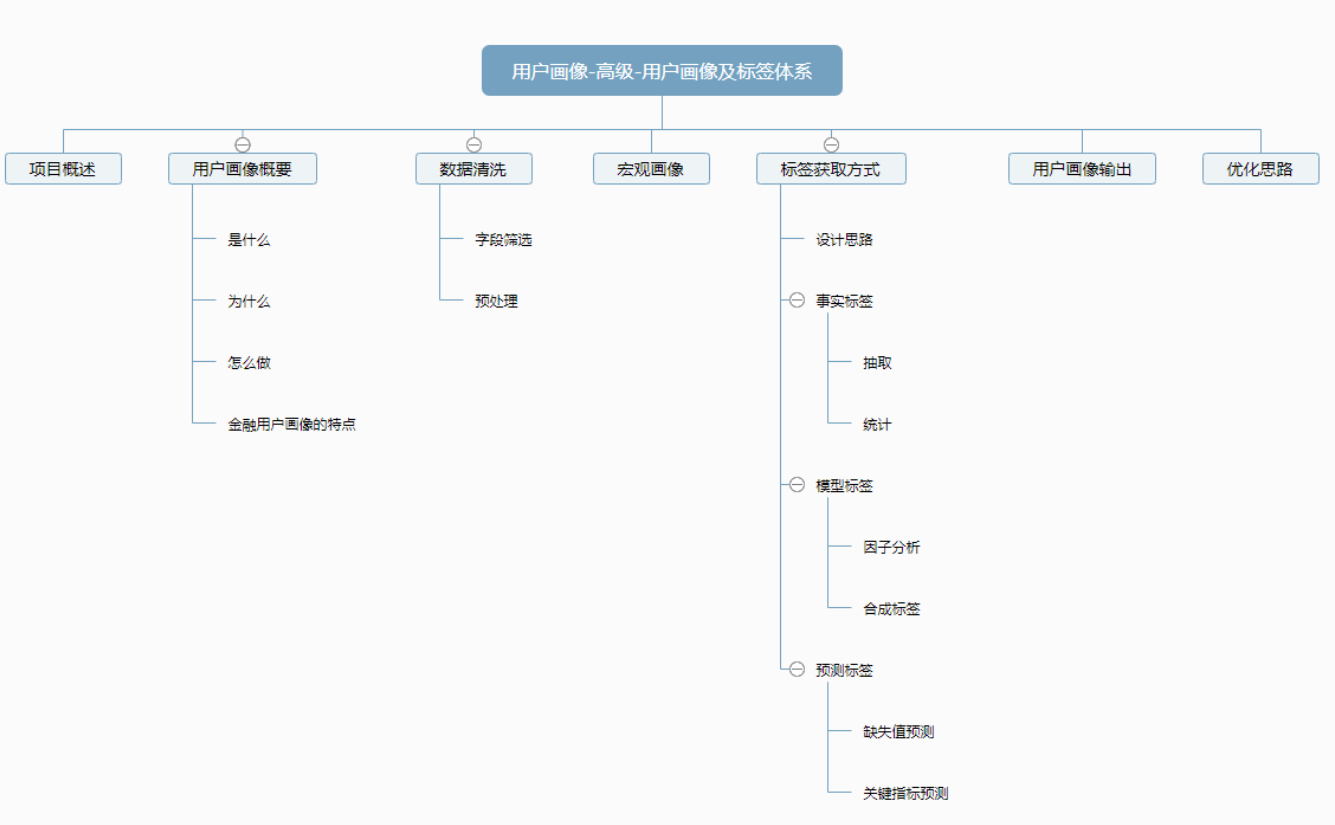

#### 用户画像概要
##### 什么是用户画像
- 当我们讨论产品、需求、场景、用户体验的时候，往往需要将焦点聚集在某类人群上，用户角色便是一种抽象的方法，是目标用户的集合。
##### 为什么需要金融用户画像
- 客户消费习惯的改变，企业无法接触到客户，无法了解客户需求
- 客户需求的分化，企业需要细分客户，为目标客户开发设计产品。
- 金融企业需要借助于户画像，来了解客户，找到目标客户，触达客户。
##### 如何构建金融用户画像
1. 数据来源
数据需要首先作整理和清洗，保证数据的质量
2. 业务建模
需要牵头和业务部门一起把模型建立起来
3. 标签
用户画像平台关键是输出标签，把过滤或筛选过的用户通过服务输出给其它系统
- 精准营销
- 风险控制
- 二次销售
4. 标签体系
- 从数据仓库的
  - 原始数据进行统计分析，得到事实标签，
  - 再进行业务建模分析，得到模型标签，
  - 再进行模型预测，得到预测标签。
- 标签体系建设是平台的关键，平台的一期可以先建设原始标签和事实标签，二期三期后项目人员对业务和标签体系有深入的了解后再进行建设。
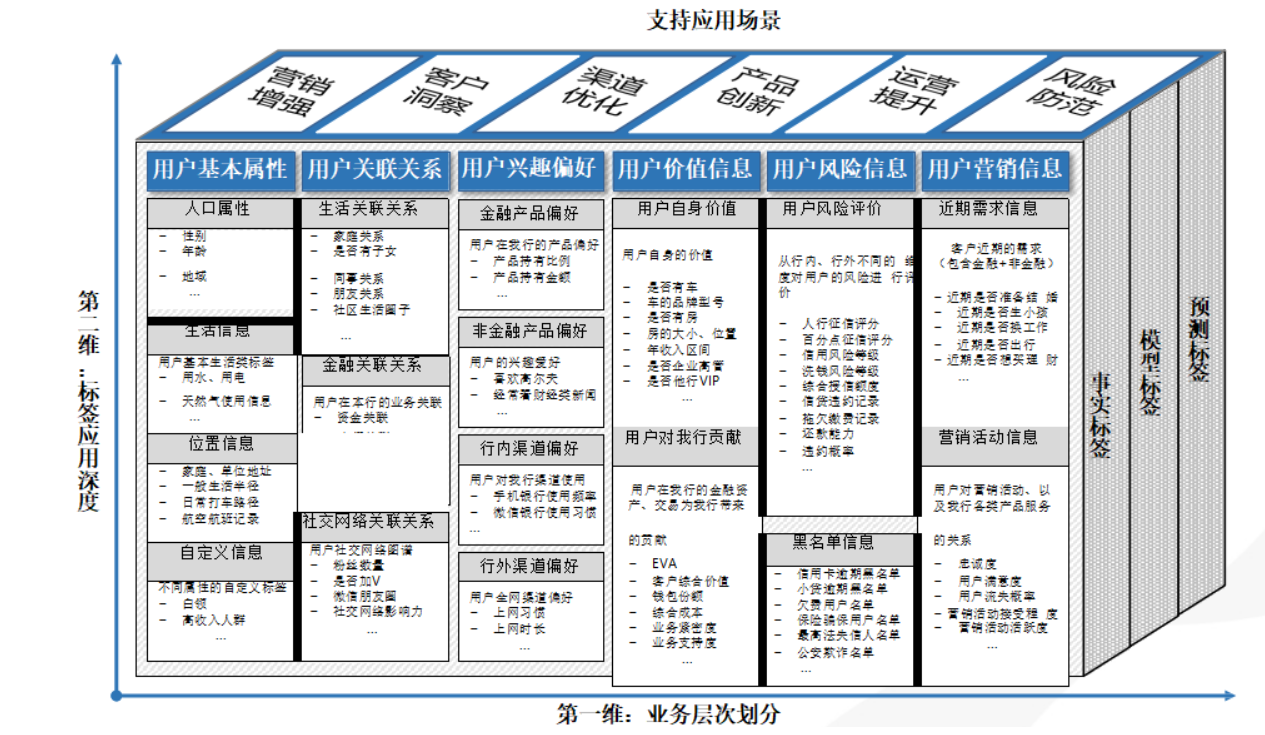
4.1. 原始标签
用户最基本的信息，一般情况下不会经常变动。比如用户的性别、注册情况和用户的学历等信息
4.2. 事实标签
是通过对于原始数据库的数据进行统计分析而来的，比如用户理财次数，是基于用户一段时间内实际理财的行为做的统计。
4.3. 模型标签
模型标签是以事实标签为基础，通过构建事实标签与业务问题之间的模型，进行模型分析得到。比如，结合用户收入模型和负债率、用户风险评分、用户存在价值。
4.4. 预测标签
在模型的基础上做预测，比如预测用户的价值、用户欺诈风险和违约风险等。

5. 用户画像系统
- 金融画像系统作为业务使用的展示平台主要有以下功能：
  - 宏观画像
  - 个体画像
  - 标签管理
  - 人群管理
  - 报表分析
  - 逾期分析
  - 用户失联修复
其中，用户画像系统的输出可以在以下几个方面为公司赋能：
- 精准营销：精准直邮、短信、App消息推送、个性化广告等。
- 用户研究：指导产品优化，甚至做到产品功能的私人定制等。
- 个性服务：个性化推荐、个性化搜索等。
- 业务决策：排名统计、地域分析、行业趋势、竞品分析等。
##### 金融用户画像特点
1. 信用信息和人口属性为主
人口属性信息就是起到触达客户的作用，人口属性信息包含姓名、性别，电话号码，邮件地址，家庭住址等信息。这些信息可以帮助金融企业联系客户，将产品和服务推销给客户。
2. 采用强相关信息，忽略弱相关信息
强相关信息就是同场景需求直接相关的信息，其可以是因果信息，也可以是相关程度很高的信息。
3. 将定量的信息归类为定性的信息
用户画像的目的是为产品筛选出目标客户，定量的信息不利于对客户进行筛选，需要将定量信息转化为定性信息，通过信息类别来筛选人群。
例如可以将年龄段对客户进行划分，18岁-25岁定义为年轻人，25岁-35岁定义为中青年，36-45定义为中年人等。可以参考个人收入信息，将人群定义为高收入人群，中等收入人群，低收入人群。
4. 用户画像的方法介绍，不要太复杂
分别是人口属性，信用属性，消费特征，兴趣爱好，社交属性。

**用户画像的基础数据存储平台：**
- 原始数据：hadoop
- 用户画像的存储：HBase，NOSQL(MongoDB)

**用户画像计算：**
- sql类型的统计分析：spark sql
- 算法预测类标签：spark sql lib

**用户画像检索：**
- ElasticSearch（使用HBase api）

#### 数据清洗

In [1]:
!pip install factor_analyzer

  Created wheel for factor-analyzer: filename=factor_analyzer-0.3.2-py3-none-any.whl size=40380 sha256=c34f1258ac858b5324781d83a1de576b0ba7b1465daa15457c02c393fd59dbf3
  Stored in directory: c:\users\ysilhouette\appdata\local\pip\cache\wheels\eb\fa\90\032dca854f9faf31265c49d06c3f6eae3ede56cca623f8a27e
Successfully built factor-analyzer


You should consider upgrading via the 'c:\users\ysilhouette\documents\pyenv\py3.6.5\scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
import os
import sys
import warnings
warnings.simplefilter("ignore")
import glob
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import cm